In [38]:
import base64
import struct
import matplotlib.pyplot as plt
import pandas as pd
f = open("hrmlog_text.txt")
lines = f.readlines()
hrmraw = lines[2]

data = base64.b64decode(hrmraw.split(":")[1])
data = list(struct.iter_unpack(">Ihhhh",data))
df = pd.DataFrame(data,columns=["time","ppg","x","y","z"])

<Axes: >

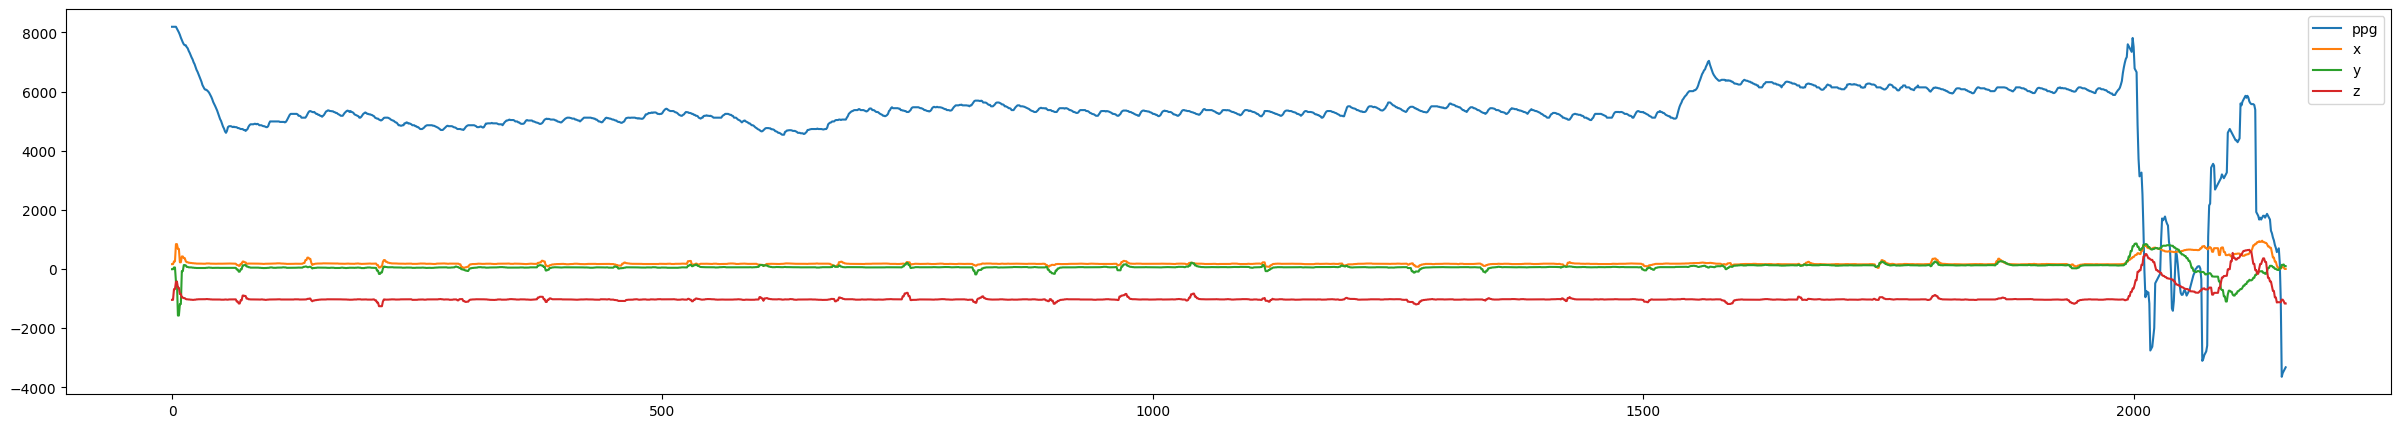

In [39]:
df[["ppg","x","y","z"]].plot(figsize=(30,5))

(1693311150,)

In [146]:
#simple grab

import sqlite3
import pandas as pd
import struct
import binascii;
import datetime
with sqlite3.connect("app.db") as con:
    res = con.execute("select uuid, hex(data) from data_sync where complete=1 order by dt desc")
    all_data = res.fetchall()
    for t in all_data[0:5]:
        print(t)
    




('24fd6648e46d49ab9ca4a4a5f852e367', '6865616C74686C6F6732333A64F526A0000000C464F526AC000000C40A68726D6C6F6732333A')
('8e625c5360b34ed9873a462bd7572928', '6865616C74686C6F6732333A64F52661000000CB64F52670000000CC0A68726D6C6F6732333A')
('4ddb6e5188ac43cab59dbc612ed030a5', '6865616C74686C6F6732333A64F52623000000DD64F52634000000E80A68726D6C6F6732333A')
('af3d3de487c041f0949ca48a0eefe7db', '6865616C74686C6F6732333A64F525E2000000B064F525F8000000B00A68726D6C6F6732333A64F525FC590064F525FC700064F525FD6B0064F525FE690064F525FE650064F5250BFE610064F526005D0064F5260B0C5D0064F5260B0C5D0064F5260B0D5D0064F5260B0D5D0064F5260B0D5D0064F52603640064F52604640064F526046E0064F52604740064F526057E0064F526057A0064F52606790064F52607780064F52608780064F52608780064F52609790064F526097F0064F5260B0F7A0064F5260B0F7A0064F5260B0F7A0064F5260B0B790064F5260B0B760064F5260C760064F5260D6F0864F5260E690064F5260F630964F52610660064F52610660064F52611640064F52612620064F52613610064F52614630064F52614600064F526155C0F64F52616560064F526175

healthlog29 6 [(1693852238, 0, 290, 0), (1693852260, 0, 213, 0), (1693852320, 0, 183, 0), (1693852380, 0, 158, 0), (1693852440, 0, 166, 0), (1693852500, 0, 156, 0)]
accellog29 5 [(1693852238, 57, 1, 289942, 0), (1693852299, 12585, 736, 510135, 0), (1693852360, 13639, 735, 701051, 0), (1693852421, 10076, 736, 864761, 0), (1693852482, 16406, 737, 1039300, 0)]

healthlog28 144 b'd\xf6\x1cX\x00\x00\x00\xc7\x00d\xf6\x1c\x88\x00\x00\x00\xcc\x00d\xf6\x1c\xc4\x00\x00\x00\xd7\x00d\xf6\x1d\x00\x00\x00\x00\xd1\x00d\xf6\x1d<\x00\x00\x00\xca\x00d\xf6\x1dx\x00\x00\x004\x00d\xf6\x1d\xb4\x00\x00\x00u\x00d\xf6\x1d\xf0\x00\x00\x00u\x00d\xf6\x1e,\x00\x00\x00\xb3\x00d\xf6\x1eh\x00\x00\x00\xbe\x00d\xf6\x1e\xa4\x00\x00\x00\xac\x00d\xf6\x1e\xe0\x00\x00\x00\x9b\x00d\xf6\x1f\x1c\x00\x00\x00\x8e\x00d\xf6\x1fX\x00\x00\x00\x8a\x00d\xf6\x1f\x94\x00\x00\x00\x89\x00d\xf6\x1f\xd0\x00\x00\x00\xc0\x00'
accellog28 180 b'd\xf6\x1cX\x00\x00\x00.\x00\x00\x00\x01d\xf6\x1c\x95\x00\x00_6\x00\x00\x02\xd6d\xf6\x1c\xd2\x00\x00G\

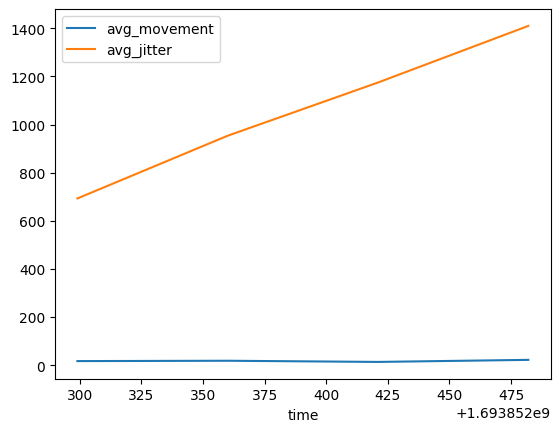

In [14]:
# check data

import sqlite3
import pandas as pd
import struct
import binascii;
import datetime
import base64
with sqlite3.connect("app.db") as con:
    res = con.execute("select uuid, hex(data) from data_sync where complete=1 order by dt desc")
    all_data = res.fetchall()
    for t in all_data[0:10]:
        files = bytearray.fromhex(t[1]).decode().split("\n")
        for f in files:
            parts = f.split(":")
            filename = parts[0]
            data = base64.b64decode(parts[1])
            if "hrmraw" in filename:
                data = list(struct.iter_unpack(">HB",data))
                df_raw = pd.DataFrame(data,columns=["value","time_delta"]) 
            elif "hrmreg" in filename:
                data = list(struct.iter_unpack(">IBB",data))
                df_reg = pd.DataFrame(data,columns=["time","bpm","conf"])
            elif "healthlog30" in filename:
                data = list(struct.iter_unpack(">IHHB",data))
            elif "accellog30" in filename:
                data = list(struct.iter_unpack(">IIIIH",data))
                df_acc = pd.DataFrame(data,columns=["time","movement","samples","jitter","padding"])
                df_acc["avg_movement"] = df_acc.movement/df_acc.samples
                df_acc["avg_jitter"] = df_acc.jitter/df_acc.samples
                df_acc[df_acc.samples > 5].plot(x="time",y=["avg_movement","avg_jitter"])
            print(filename, len(data), data)
            
        print()

        

here


<Axes: xlabel='date'>

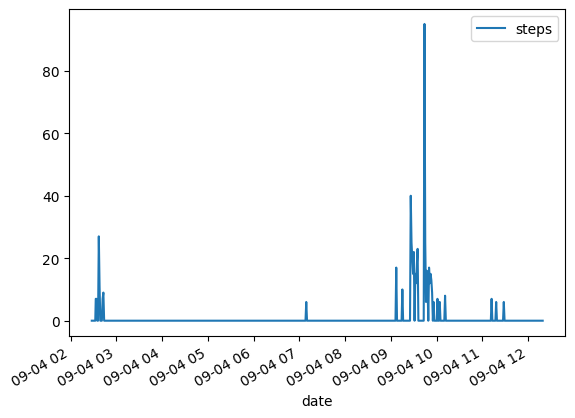

In [1]:
# let's extract all of the data and grab a clean table of steps taken

import sqlite3
import pandas as pd
import struct
import binascii;
import datetime
import base64
full_data = []
print("here")
with sqlite3.connect("app.db") as con:
    res = con.execute("select uuid, hex(data) from data_sync where complete=1 order by dt asc")
    all_data = res.fetchall()
    
    for t in all_data:

        files = bytearray.fromhex(t[1]).decode().split("\n")
        for f in files:
            parts = f.split(":")
            filename = parts[0]
            data = base64.b64decode(parts[1])
            if "healthlog" in filename:
                data = list(struct.iter_unpack(">IHHB",data))
                full_data.extend(data)
            
df = pd.DataFrame(full_data,columns=["timestamp", "steps", "movement", "notused"])
df["movement_accumulated"] = df.movement.cumsum()
df["date"] = df.timestamp.apply(datetime.datetime.fromtimestamp)
df["steps_accumulated"] = df.steps.cumsum()
df.plot(x="date",y="steps")

        
